In [25]:
#In this file I start with running the Lasso on subset of variables based on slope analysis
#It brings down the number of features to about 95 
#Running subsequent VIF requires elimination of a couple of variables
#VIF values are still high but the model is producing Train and Test R2 of about 0.69 and 0.65

#Second part of the work here was to introduce the migration data
#Introducing this feature did not improve R2 significantly but no clear conclusions can be drawn
#until the multicolinearity issue is reso
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [194]:
phoenix_zri=pd.read_csv("Phoenix_MF_ZRI.csv")
acs_features=pd.read_csv("ACS_Phoenix_Imputed_Final.csv")
migration_feature=pd.read_csv("ACS_Migrations_Phoenix.csv")

In [195]:
migration_feature=migration_feature["migrations"]

In [207]:
y=phoenix_zri.sort_values(["zipcode","Year","Month"])["ZRI"]
#features selected by slope analysis 
features=[
    #'hispanic_any_race',
 'income_30000_34999',
 'bachelors_degree_or_higher_25_64',
 'in_grades_9_to_12',
 'commute_90_more_mins',
 'bachelors_degree',
 'poverty',
 'occupation_management_arts',
 'female_70_to_74',
 'median_income',
 'owner_occupied_housing_units_upper_value_quartile',
 'in_grades_1_to_4',
 'income_25000_29999',
 'female_5_to_9',
 'vacant_housing_units_for_rent',
 'income_125000_149999',
 'male_75_to_79',
 'two_parents_in_labor_force_families_with_young_children',
 'employed_wholesale_trade',
 'mobile_homes',
 'vacant_housing_units_for_sale',
 'rent_15_to_20_percent',
 'employed_information',
 'one_parent_families_with_young_children',
 'male_45_64_graduate_degree',
 'rent_10_to_15_percent',
 'families_with_young_children',
 'female_85_and_over',
 'Year',
 'female_15_to_17',
 'white_male_55_64',
 'father_in_labor_force_one_parent_families_with_young_children',
 'high_school_diploma',
 'male_15_to_17',
 'commute_5_9_mins',
 'high_school_including_ged',
 'percent_income_spent_on_rent',
 'commuters_by_carpool',
 'occupation_production_transportation_material',
 'income_10000_14999',
 'million_dollar_housing_units',
 'dwellings_2_units',
 'hispanic_male_45_54',
 'bachelors_degree_2',
 'hispanic_pop',
 'male_5_to_9',
 'owner_occupied_housing_units_lower_value_quartile',
 'employed_other_services_not_public_admin',
 'male_85_and_over',
 'unemployed_pop',
 'male_45_64_grade_9_12',
 'do_date',
 'commute_30_34_mins',
 'rent_40_to_50_percent',
 'hispanic_male_55_64',
 'income_75000_99999',
 'owner_occupied_housing_units_median_value',
 'different_house_year_ago_same_city',
 'income_150000_199999',
 'employed_finance_insurance_real_estate',
 'amerindian_including_hispanic',
 'income_200000_or_more',
 'rent_30_to_35_percent',
 'dwellings_1_units_attached',
 'commute_60_89_mins',
 'children',
 'income_15000_19999',
 'female_under_5',
 'male_45_64_bachelors_degree',
 'dwellings_50_or_more_units',
 'white_pop',
 'two_parents_not_in_labor_force_families_with_young_children',
 'female_10_to_14',
 'occupation_services',
 'gini_index',
 'less_one_year_college',
 'commute_25_29_mins',
 'renter_occupied_housing_units_paying_cash_median_gross_rent',
 'commuters_by_bus',
 'male_under_5',
 'rent_35_to_40_percent',
 'median_age',
 'occupation_natural_resources_construction_maintenance',
 'no_car',
 'male_45_64_less_than_9_grade',
 'male_10_to_14',
 'male_67_to_69',
 'geo_id',
 'worked_at_home',
 'children_in_single_female_hh',
 'female_75_to_79',
 'male_45_64_high_school',
 'households_public_asst_or_food_stamps',
 'less_than_high_school_graduate',
 'median_rent',
 'two_parent_families_with_young_children',
 'employed_construction',
 'father_one_parent_families_with_young_children',
 'not_us_citizen_pop',
 'commute_45_59_mins',
 'no_cars',
 'amerindian_pop',
 'masters_degree',
 'rent_under_10_percent',
 'in_grades_5_to_8',
 'income_20000_24999',
 'commute_60_more_mins',
 #'management_business_sci_arts_employed',
 'commute_less_10_mins',
 'income_100000_124999',
 'nonfamily_households',
 'male_65_to_66',
 'housing_built_2005_or_later',
 'graduate_professional_degree',
 'income_per_capita',
 'two_parents_father_in_labor_force_families_with_young_children']
X=acs_features[features].astype(float)

In [208]:
XTrain, XTest, ytrain, ytest = train_test_split(X, y)
alpha_list = np.linspace(10, 50, 20)
results = []

for alpha in alpha_list:
    print(alpha)
    lasso = Lasso(fit_intercept=True, alpha=alpha, max_iter=30000, tol=0.00001)
    score = cross_val_score(lasso, XTrain, ytrain, cv=3).mean()
    results.append({'alpha':alpha, 'model': lasso, 'score': score})
    
resultsDF = pd.DataFrame(results)


10.0


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2769882.8511624825, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2942320.452661757, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2333697.8627396794, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


12.105263157894736


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2793149.43272897, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3013535.9108095802, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2361727.411153806, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


14.210526315789473


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2855940.271619156, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3080175.9322840064, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2408924.526258442, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


16.315789473684212


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948316.781972931, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3139757.771451923, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2461910.6189526566, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


18.421052631578945


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2998942.7678357936, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3192226.6955818557, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2490737.6036789604, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


20.526315789473685


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3041302.741631741, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3237879.8326239134, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2513076.6690527075, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


22.63157894736842


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3068217.575806652, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3259747.5240560793, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2550820.730411809, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


24.736842105263158


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3096356.2484632675, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3270147.4644321026, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2586368.836292164, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


26.842105263157894


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3077811.679031516, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3316207.0563097727, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2605065.781783243, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


28.94736842105263


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3116439.875425167, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3351686.7199636684, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2632049.146989811, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


31.052631578947366


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3143150.800754683, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3412292.4961119182, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2645287.9227235937, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


33.1578947368421


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3191213.8179779532, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3468383.062494501, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2658714.929591733, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


35.26315789473684


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3219537.8475849438, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3510248.3959965953, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2642069.277290844, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


37.368421052631575


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3263646.670906178, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3533266.801586698, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2668412.4633093444, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


39.473684210526315


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3290197.9338406427, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3545599.0379400766, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2694752.8606569725, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


41.578947368421055


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3325189.7062741946, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3551274.7990871714, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2725688.697697389, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


43.68421052631579


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3347912.2523112334, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3559916.244734162, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2735089.3177744416, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


45.78947368421053


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3337692.5623253547, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3598313.2579232818, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2746783.783757044, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


47.89473684210526


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3307320.439898937, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3627767.6244703876, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2752502.692422862, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


50.0


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3275904.122086937, tolerance: 181.58406836601307
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3588299.012533161, tolerance: 184.85309390522877
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2732293.0147780534, tolerance: 189.89185978758172
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:xlabel='alpha', ylabel='score'>

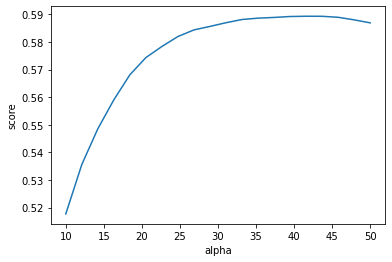

In [209]:
resultsDF = resultsDF.iloc[0:500,]
sns.lineplot(data=resultsDF, x="alpha", y="score")

In [210]:
optimal_model = resultsDF['model'][resultsDF['score'] == resultsDF['score'].max()].values[0]
optimal_model

Lasso(alpha=41.578947368421055, max_iter=30000, tol=1e-05)

In [211]:
optimal_model.fit(XTrain, ytrain)

/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4975291.815476217, tolerance: 278.22787960784314
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=41.578947368421055, max_iter=30000, tol=1e-05)

In [212]:
optimal_model.score(XTrain, ytrain)

0.692069486853456

In [213]:
optimal_model.score(XTest, ytest)

0.6554571807560101

In [223]:
lassoCoef = pd.Series(optimal_model.coef_, index=XTrain.columns)
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
features_to_keep_lasso=sortedCoefs[sortedCoefs!=0].index
features_to_keep_lasso

Index(['rent_35_to_40_percent', 'dwellings_2_units',
       'two_parents_not_in_labor_force_families_with_young_children',
       'income_30000_34999', 'income_200000_or_more', 'male_65_to_66',
       'male_45_64_graduate_degree', 'amerindian_pop', 'male_85_and_over',
       'amerindian_including_hispanic', 'male_under_5', 'male_15_to_17',
       'rent_30_to_35_percent', 'million_dollar_housing_units', 'male_5_to_9',
       'hispanic_male_45_54',
       'two_parents_in_labor_force_families_with_young_children',
       'in_grades_1_to_4', 'commute_25_29_mins', 'employed_wholesale_trade',
       'income_100000_124999', 'no_cars', 'commute_60_more_mins',
       'hispanic_male_55_64', 'male_45_64_bachelors_degree',
       'income_75000_99999', 'dwellings_50_or_more_units',
       'commute_45_59_mins', 'rent_40_to_50_percent', 'rent_10_to_15_percent',
       'two_parents_father_in_labor_force_families_with_young_children',
       'female_under_5', 'income_150000_199999',
       'father_one_

In [224]:
len(features_to_keep_lasso)

95

In [216]:
Xlasso=acs_features[features_to_keep_lasso]
lm = LinearRegression()

X1_train, X1_test, Y_train, Y_test = train_test_split(acs_features[features_to_keep_lasso].astype(float),y,test_size=0.2)
lm.fit(X1_train, Y_train)

print("Train Score: %.4f" % lm.score(X1_train, Y_train))
print("Test Score:  %.4f" % lm.score(X1_test, Y_test))

print(lm.score(X1_train, Y_train)- lm.score(X1_test, Y_test))

Train Score: 0.6996
Test Score:  0.6941
0.005470318361916693


In [218]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Xlasso = add_constant(X1_train)
pd.Series([variance_inflation_factor(Xlasso.values, i) 
               for i in range(Xlasso.shape[1])], 
              index=Xlasso.columns).sort_values(ascending=False)

const                                                             2.110145e+08
children                                                          2.796574e+04
families_with_young_children                                      9.788189e+03
bachelors_degree_2                                                9.712036e+03
bachelors_degree                                                  9.059021e+03
high_school_including_ged                                         7.068509e+03
owner_occupied_housing_units_median_value                         4.560153e+03
high_school_diploma                                               4.157767e+03
bachelors_degree_or_higher_25_64                                  3.544250e+03
income_per_capita                                                 3.088787e+03
hispanic_pop                                                      2.539994e+03
in_grades_1_to_4                                                  2.439647e+03
owner_occupied_housing_units_upper_value_quartile   

In [125]:
XMig=pd.concat([X,migration_feature],axis=1)
XMigTrain, XMigTest, ytrain, ytest = train_test_split(XMig, y)
alpha_list = np.linspace(10, 50, 20)
resultsMig = []

for alpha in alpha_list:
    print(alpha)
    lasso = Lasso(fit_intercept=True, alpha=alpha, max_iter=30000, tol=0.00001)
    score = cross_val_score(lasso, XMigTrain, ytrain, cv=3).mean()
    resultsMig.append({'alpha':alpha, 'model': lasso, 'score': score})
    
resultsMigDF = pd.DataFrame(resultsMig)

10.0


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2209754.4784769714, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2581148.706366412, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2310020.766405875, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


12.105263157894736


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2368323.8590813596, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2749257.45004862, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2369959.1092884107, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


14.210526315789473


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2441038.38560399, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2765291.6028521466, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2417788.4265958886, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


16.315789473684212


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2482420.1091023865, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2824768.7647742266, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2477205.5152302394, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


18.421052631578945


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2391256.7341642035, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2901766.847519011, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2528005.415944054, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


20.526315789473685


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2444039.720056342, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2958214.468063681, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2556151.6681336886, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


22.63157894736842


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2455243.180317279, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2998982.608767606, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2590825.2826973116, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


24.736842105263158


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2354031.7800324922, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3028741.1756497934, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2650336.7984799184, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


26.842105263157894


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2546955.3648651447, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3060046.805363546, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2659357.652084538, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


28.94736842105263


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2644425.197559068, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3030725.3617610103, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2641525.4690086376, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


31.052631578947366


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708761.146794058, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3026127.3053677175, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2529621.6497272076, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


33.1578947368421


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2752708.370030547, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3058146.9933861378, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2565121.310436908, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


35.26315789473684


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2788139.502374308, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3114306.0504382416, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2739523.5772762205, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


37.368421052631575


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2814180.307800753, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3135036.862803704, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2843911.3501491975, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


39.473684210526315


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2849735.656446605, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3158100.697291106, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2916685.2142784423, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


41.578947368421055


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2910923.016369199, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3191407.0186589174, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2933021.134361922, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


43.68421052631579


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2922854.1392059345, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3222737.434006746, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2957884.021159066, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


45.78947368421053


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2919693.5436777864, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3250314.3228502665, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3050964.489071654, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


47.89473684210526


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2947466.5754199605, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3273043.999260784, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3084977.0158329355, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


50.0


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2969619.9311574847, tolerance: 174.51943111111115
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3306671.1143854996, tolerance: 174.8582832679739
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3116114.2980725793, tolerance: 179.0914811764706
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:xlabel='alpha', ylabel='score'>

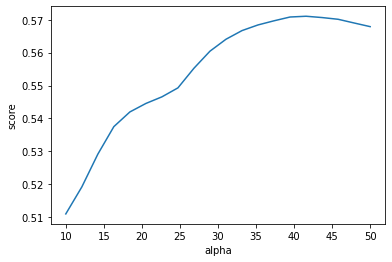

In [126]:
resultsMigDF = resultsMigDF.iloc[0:500,]
sns.lineplot(data=resultsMigDF, x="alpha", y="score")

In [127]:
optimal_mig_model = resultsMigDF['model'][resultsMigDF['score'] == resultsMigDF['score'].max()].values[0]
optimal_mig_model

Lasso(alpha=41.578947368421055, max_iter=30000, tol=1e-05)

In [132]:
optimal_mig_model.fit(XMigTrain, ytrain)

/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4695329.955328941, tolerance: 264.3000880610022
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=41.578947368421055, max_iter=30000, tol=1e-05)

In [133]:
optimal_mig_model.score(XMigTrain, ytrain)

0.6947871370720311

In [134]:
lassoMigCoef = pd.Series(optimal_mig_model.coef_, index=XMigTrain.columns)
sortedMigCoefs = np.abs(lassoMigCoef).sort_values(ascending=False)
features_to_keep_mig_lasso=sortedMigCoefs[sortedMigCoefs!=0].index
features_to_keep_mig_lasso

Index(['dwellings_2_units', 'male_65_to_66', 'rent_35_to_40_percent',
       'male_45_64_graduate_degree', 'income_30000_34999', 'male_85_and_over',
       'two_parents_not_in_labor_force_families_with_young_children',
       'amerindian_pop', 'male_15_to_17', 'rent_30_to_35_percent',
       'amerindian_including_hispanic', 'male_under_5', 'geo_id',
       'income_200000_or_more', 'rent_10_to_15_percent',
       'million_dollar_housing_units', 'commuters_by_bus', 'male_5_to_9',
       'hispanic_male_45_54', 'commute_90_more_mins',
       'dwellings_50_or_more_units', 'commute_25_29_mins',
       'rent_40_to_50_percent', 'no_car',
       'father_one_parent_families_with_young_children', 'in_grades_1_to_4',
       'male_45_64_bachelors_degree', 'no_cars', 'income_150000_199999',
       'commute_45_59_mins', 'female_under_5', 'commute_5_9_mins',
       'male_45_64_high_school', 'commute_60_more_mins', 'female_75_to_79',
       'income_100000_124999', 'employed_wholesale_trade',
       'le

In [136]:
len(features_to_keep_mig_lasso)

96